In [48]:
# pip3 install jupyter pandas matplotlib seaborn numpy scikit-learn joblib

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [50]:
df = pd.read_csv("data/diabetes_prediction_dataset.csv")

In [51]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [52]:
df.shape

(100000, 9)

In [53]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


# Encoding

In [54]:
# null values are stored as 'No Info' in smoking_history
df["smoking_history"] = df["smoking_history"].replace('No Info', np.nan)

is_null = df.isnull().sum()
print(is_null)

gender                     0
age                        0
hypertension               0
heart_disease              0
smoking_history        35816
bmi                        0
HbA1c_level                0
blood_glucose_level        0
diabetes                   0
dtype: int64


In [55]:
encoded_data = pd.get_dummies(df, columns=['smoking_history', 'gender'])
encoded_data.to_csv("data/encoded_data.csv", index=False)

In [56]:
# new data
df = pd.read_csv("data/encoded_data.csv")

# Plots

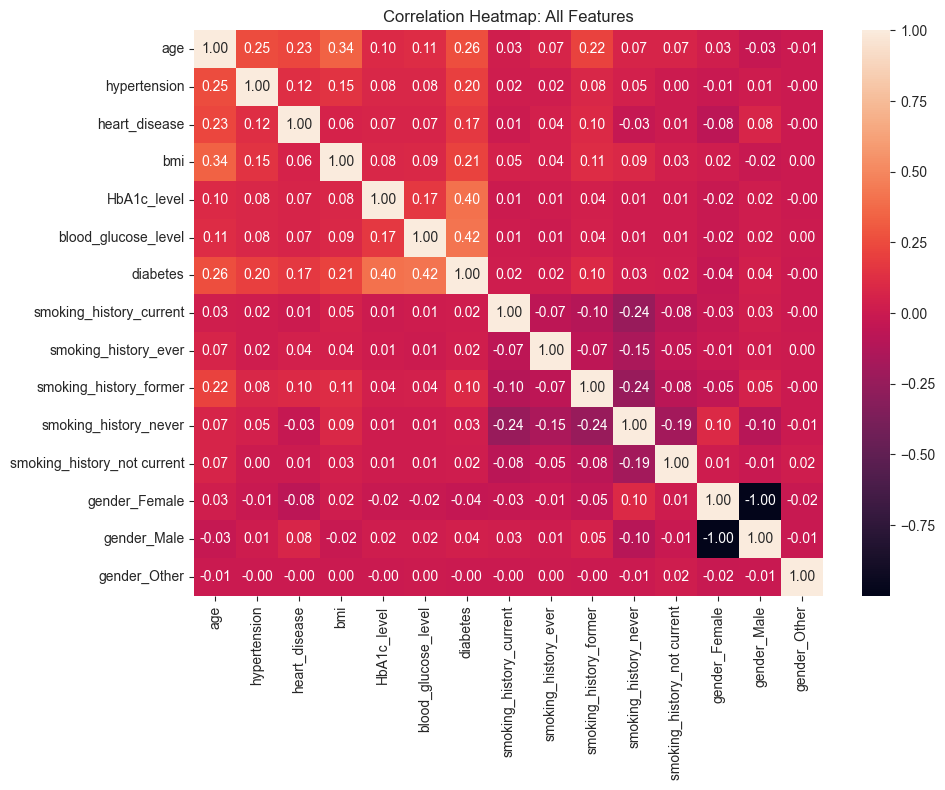

In [57]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt = '.2f')
plt.title("Correlation Heatmap: All Features")
plt.tight_layout()
plt.savefig("images/correlation_heatmap_all_features.png")
plt.show()

smoking_history and gender columns need to go, very weak correlation 

In [58]:
df.drop(['gender_Female', 'gender_Male', 'gender_Other', 'smoking_history_current', 'smoking_history_ever', 'smoking_history_former', 'smoking_history_never', 'smoking_history_not current'], axis=1, inplace=True)

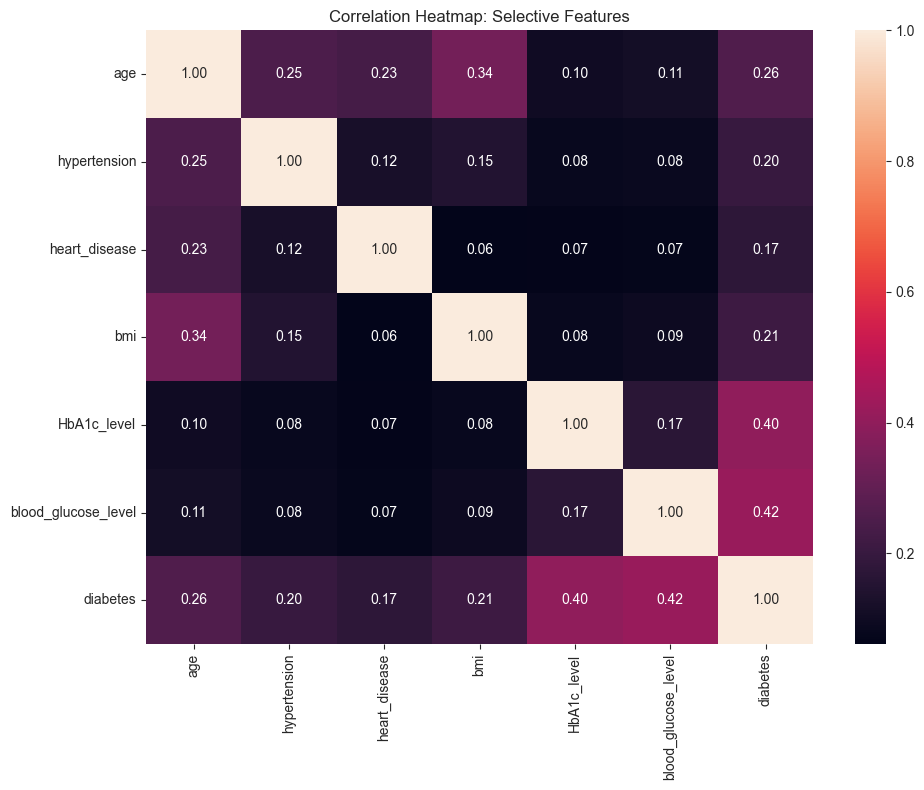

In [59]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt = '.2f')
plt.title("Correlation Heatmap: Selective Features")
plt.tight_layout()
plt.savefig("images/correlation_heatmaps_selective_features.png")
plt.show()

/var/folders/ql/0fjbxg7d6vv5jpl21xq4gdf00000gn/T/ipykernel_91975/2724330769.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bp.set_xticklabels(['Non-Diabetic', 'Diabetic'])


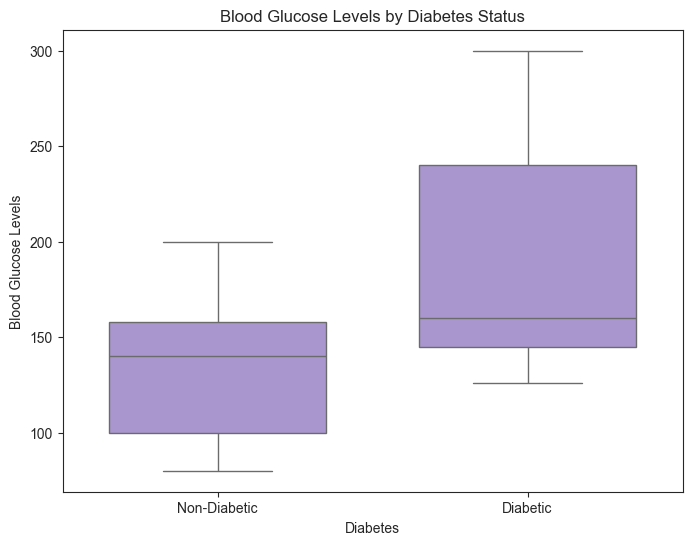

In [60]:
plt.figure(figsize=(8, 6))
sns.set_palette(['#a78cd9', '#cda4de'])
sns.set_style("ticks") 
plt.title("Blood Glucose Levels by Diabetes Status")
bp = sns.boxplot(data=df, x='diabetes', y='blood_glucose_level', width=0.7)
bp.set_xticklabels(['Non-Diabetic', 'Diabetic'])
plt.xlabel("Diabetes")
plt.ylabel("Blood Glucose Levels")
plt.savefig("images/boxplot_bgl.png")
plt.show()

/var/folders/ql/0fjbxg7d6vv5jpl21xq4gdf00000gn/T/ipykernel_91975/3594949483.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bp.set_xticklabels(['Non-Diabetic', 'Diabetic'])


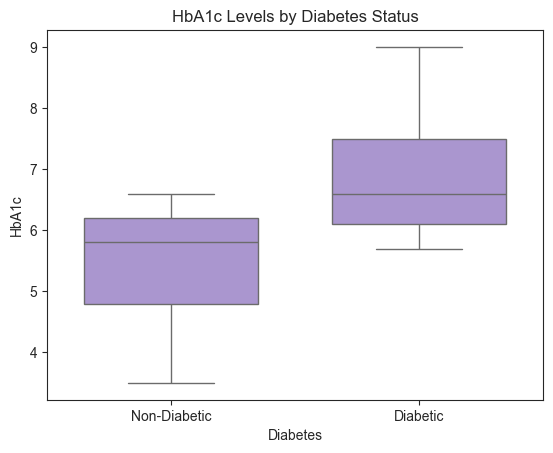

In [61]:
plt.title("HbA1c Levels by Diabetes Status")
bp = sns.boxplot(data=df, x='diabetes', y='HbA1c_level', width=0.7)
bp.set_xticklabels(['Non-Diabetic', 'Diabetic'])
plt.xlabel("Diabetes")
plt.ylabel("HbA1c")
plt.savefig("images/boxplot_hbA1c.png")
plt.show()

/var/folders/ql/0fjbxg7d6vv5jpl21xq4gdf00000gn/T/ipykernel_91975/3935151429.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bp.set_xticklabels(['Non-Diabetic', 'Diabetic'])


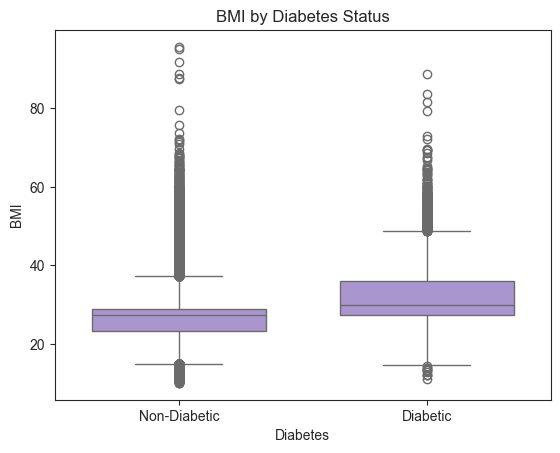

In [62]:
plt.title("BMI by Diabetes Status")
bp = sns.boxplot(data=df, x='diabetes', y='bmi', width=0.7)
bp.set_xticklabels(['Non-Diabetic', 'Diabetic'])
plt.xlabel("Diabetes")
plt.ylabel("BMI")
plt.savefig("images/boxplot_bmi.png")
plt.show()

/var/folders/ql/0fjbxg7d6vv5jpl21xq4gdf00000gn/T/ipykernel_91975/1598672528.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bp.set_xticklabels(['Non-Diabetic', 'Diabetic'])


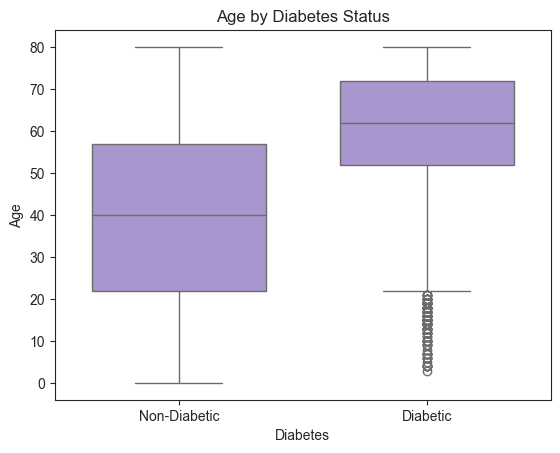

In [63]:
plt.title("Age by Diabetes Status")
bp = sns.boxplot(data=df, x='diabetes', y='age', width=0.7)
bp.set_xticklabels(['Non-Diabetic', 'Diabetic'])
plt.xlabel("Diabetes")
plt.ylabel("Age")
plt.savefig("images/boxplot_age.png")
plt.show()

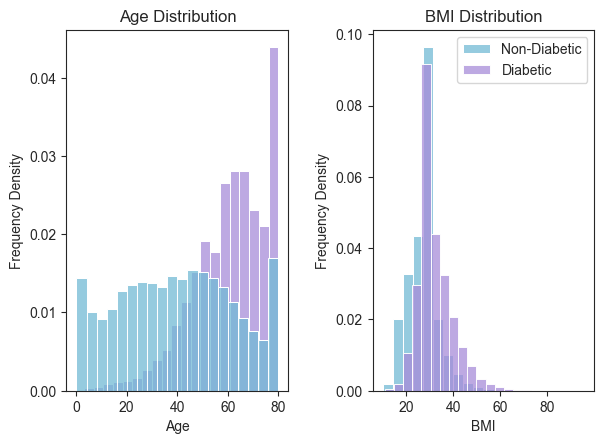

In [64]:
fig, axs = plt.subplots(1, 2)
axs[0].set_title("Age Distribution")
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Frequency Density")
sns.histplot(data=df[df['diabetes'] == 1]['age'], label='Diabetic', bins=20, color='#a78cd9', ax=axs[0], stat='density')
sns.histplot(data=df[df['diabetes'] == 0]['age'], label='Non-Diabetic', bins=20, color='#72bad5', ax=axs[0], stat='density')

axs[1].set_title("BMI Distribution")
axs[1].set_xlabel("BMI")
axs[1].set_ylabel('Frequency Density')
sns.histplot(data=df[df['diabetes'] == 0]['bmi'], label='Non-Diabetic', bins=20, color='#72bad5', ax=axs[1], stat='density')
sns.histplot(data=df[df['diabetes'] == 1]['bmi'], label='Diabetic', bins=20, color='#a78cd9', ax=axs[1], stat='density')
plt.tight_layout(pad=2) 
plt.legend()
plt.savefig("images/age_and_bmi_dense_histograms.png")
plt.show()

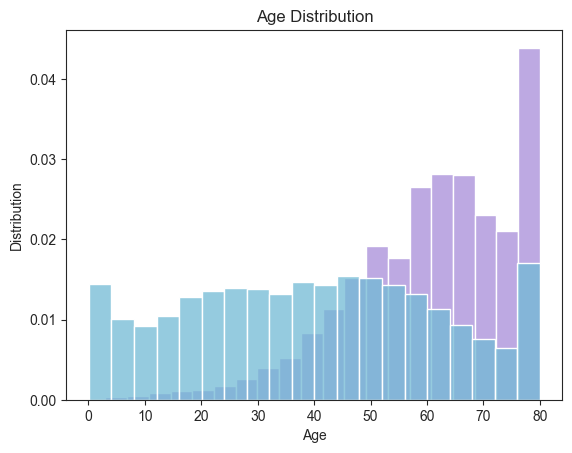

In [65]:
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Distribution")
sns.histplot(data=df[df['diabetes'] == 1]['age'], label='Diabetic', bins=20, color='#a78cd9', stat='density')
sns.histplot(data=df[df['diabetes'] == 0]['age'], label='Non-Diabetic', bins=20, color='#72bad5', stat='density')
plt.show()

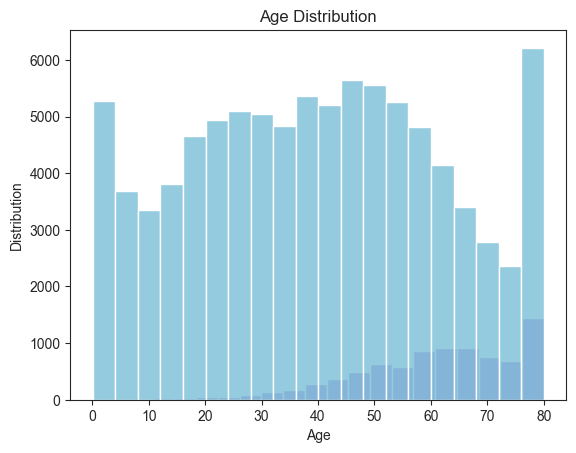

In [66]:
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Distribution")
sns.histplot(data=df[df['diabetes'] == 1]['age'], label='Diabetic', bins=20, color='#a78cd9')
sns.histplot(data=df[df['diabetes'] == 0]['age'], label='Non-Diabetic', bins=20, color='#72bad5')
plt.show()

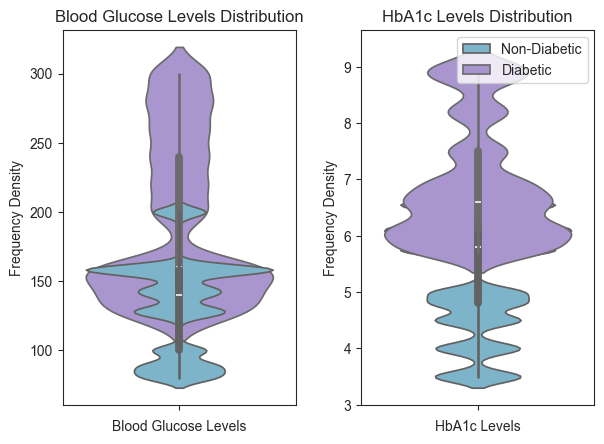

In [67]:
fig, axs = plt.subplots(1, 2)
axs[0].set_title("Blood Glucose Levels Distribution")
axs[0].set_xlabel("Blood Glucose Levels")
axs[0].set_ylabel("Frequency Density")
sns.violinplot(data=df[df['diabetes'] == 1]['blood_glucose_level'], label='Diabetic', color='#a78cd9', ax=axs[0])
sns.violinplot(data=df[df['diabetes'] == 0]['blood_glucose_level'], label='Non-Diabetic', color='#72bad5', ax=axs[0])

axs[1].set_title("HbA1c Levels Distribution")
axs[1].set_xlabel("HbA1c Levels")
axs[1].set_ylabel('Frequency Density')
sns.violinplot(data=df[df['diabetes'] == 0]['HbA1c_level'], label='Non-Diabetic', color='#72bad5', ax=axs[1])
sns.violinplot(data=df[df['diabetes'] == 1]['HbA1c_level'], label='Diabetic', color='#a78cd9', ax=axs[1])
plt.tight_layout(pad=2) 
plt.legend()
plt.savefig("images/bgl_and_hb1ac_dense_violinplots.png")
plt.show()

Plots show that data is imbalanced, there are significantly more people without diabetes than people with diabetes, 8.5:91.5.
This means that the model would overfit and needs to be balanced in order to have accuracy in different datasets.

# Models

In [68]:
x = df.drop(columns=["diabetes"])
y = df["diabetes"]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=26)

In [69]:
# Logistic Regression

lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
print("Accuracy: ", accuracy_score(y_pred_lr, y_test)*100, "%")
print(f"Precision: {precision_score(y_pred_lr, y_test)}")
print(f"Recall Score: {recall_score(y_pred_lr, y_test)}")
print(f"F1 Score: {f1_score(y_pred_lr, y_test)}")
print(f"confusion Matrix: \n {confusion_matrix(y_pred_lr, y_test)}")


Accuracy:  96.03 %
Precision: 0.6219584569732938
Recall Score: 0.8697095435684647
F1 Score: 0.7252595155709343
confusion Matrix: 
 [[18158   637]
 [  157  1048]]


In [70]:
# Decision Tree Classifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(x_train, y_train)
y_pred_tree = tree.predict(x_test)
print("Accuracy: ", accuracy_score(y_pred_tree, y_test)*100, "%")
print(f"Precision: {precision_score(y_pred_tree, y_test)}")
print(f"Recall Score: {recall_score(y_pred_tree, y_test)}")
print(f"F1 Score: {f1_score(y_pred_tree, y_test)}")
print(f"confusion Matrix: \n {confusion_matrix(y_pred_tree, y_test)}")


Accuracy:  95.38 %
Precision: 0.7240356083086054
Recall Score: 0.7266229898749256
F1 Score: 0.7253269916765755
confusion Matrix: 
 [[17856   465]
 [  459  1220]]


In [72]:
# Random Forest Classifier

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print("Accuracy: ", accuracy_score(y_pred_rf, y_test)*100, "%")
print(f"Precision: {precision_score(y_pred_rf, y_test)}")
print(f"Recall Score: {recall_score(y_pred_rf, y_test)}")
print(f"F1 Score: {f1_score(y_pred_rf, y_test)}")
print(f"confusion Matrix: \n {confusion_matrix(y_pred_rf, y_test)}")


Accuracy:  96.875 %
Precision: 0.6943620178041543
Recall Score: 0.9140625
F1 Score: 0.7892074198988196
confusion Matrix: 
 [[18205   515]
 [  110  1170]]


# Accessing Weights for Webpage Logic 

In [73]:
print(lr.coef_)

[[1.02225306 0.21474577 0.15288444 0.60010501 2.50059294 1.36371251]]
